$$
\text{This is the cutdown companion Jupyter Notebook of Chapter 4. Molecular Hamiltonians of the book titled:}$$
$$\text{ Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code and with ISBN: 978-1-80323-859-3.}$$

# MIT License

Copyright (c) 2022 Packt

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# 4. Molecular Hamiltonians

# Technical requirements


## Installing NumPy, Qiskit and importing various modules
Install NumPy with the following command:

In [ ]:
pip install numpy

Install Qiskit with the following command:

In [ ]:
pip install qiskit

Install Qiskit visualization support with the following command:

In [ ]:
pip install 'qiskit[visualization]'

Install Qiskit Nature with the following command:

In [ ]:
pip install qiskit-nature

Install PySCF with the following command:

In [ ]:
pip install pyscf

Import NumPy with the following command:

In [ ]:
import numpy as np

Import Matplotlib, a comprehensive library for creating static, animated, and interactive visualizations in Python with the following command:



In [ ]:
import matplotlib.pyplot as plt

Import the required functions and class methods with the following commands. The array_to_latex function() returns a Latex representation of a complex array with dimension 1 or 2:

In [ ]:
from qiskit.visualization import array_to_latex, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit import execute, Aer
import qiskit.quantum_info as qi
from qiskit.extensions import Initialize
from qiskit.providers.aer import extensions  # import aer snapshot instructions

Import Qiskit Nature libraries with the following commands:

In [ ]:
from qiskit import Aer
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.mappers.second_quantization import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.transformers.second_quantization.electronic import ActiveSpaceTransformer, FreezeCoreTransformer
from qiskit_nature.operators.second_quantization import FermionicOp

Import the Qiskit Nature property framework with the following command:

In [ ]:
from qiskit_nature.properties import Property, GroupedProperty

Import the ElectronicEnergy property with the following command:

In [ ]:
# https://qiskit.org/documentation/nature/tutorials/08_property_framework.html
from qiskit_nature.properties.second_quantization.electronic import (
    ElectronicEnergy,
    ElectronicDipoleMoment,
    ParticleNumber,
    AngularMomentum,
    Magnetization,
)

Import the ElectronicIntegrals property with the following command:

In [ ]:
from qiskit_nature.properties.second_quantization.electronic.integrals import (
    ElectronicIntegrals,
    OneBodyElectronicIntegrals,
    TwoBodyElectronicIntegrals,
    IntegralProperty,
)
from qiskit_nature.properties.second_quantization.electronic.bases import ElectronicBasis

Import math libraries with the following command:

In [ ]:
import cmath
import math

# 4.1. Born-Oppenheimer approximation



# 4.2. Fock space

# 4.3. Fermionic creation and annihilation operators


# 4.4. Molecular Hamiltonian in the Hartree-Fock orbitals basis


# 4.5. Basis sets

## 4.5.1. Slater-type orbitals

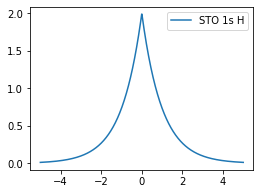

In [ ]:
x = np.linspace(-5,5,num=1000)
r = abs(x)

alpha = 1.0

R = 2*alpha**(1.5)*np.exp(-alpha*r)

plt.figure(figsize=(4,3))
plt.plot(x,R,label="STO 1s H")
plt.legend()

Figure 4.5 – Plot of the radial part of the Slater-type orbital for the 1 s orbital of the hydrogen atom

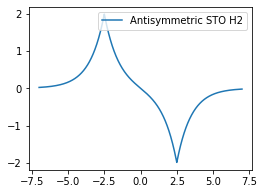

In [ ]:
x = np.linspace(-7,7,num=1000)
r1 = abs(x+2.5)
r2 = abs(x-2.5)

alpha = 1.0

R = 2*alpha**(1.5)*np.exp(-alpha*r1)-2*alpha**(1.5)*np.exp(-alpha*r2)

plt.figure(figsize=(4,3))
plt.plot(x,R,label="Antisymmetric STO H2")
plt.legend()

Figure 4.6 – Plot of the anti-symmetric wave function of the hydrogen molecule

## 4.5.2. Gaussian-type orbitals

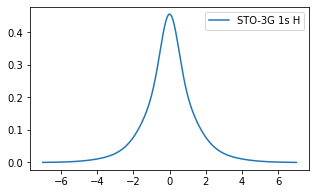

In [ ]:
x = np.linspace(-7,7,num=1000)
r = abs(x)

c = [0.444635,0.535328,0.154329]
alpha = [0.109818,0.405771,2.227660]

psi = 0
for k in range(3):
  psi += c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r**2)

plt.figure(figsize=(5,3))
plt.plot(x,psi,label="STO-3G 1s H")
plt.legend()

Figure 4.7 – Plot of the STO-3G function for the 1s orbital of the hydrogen atom

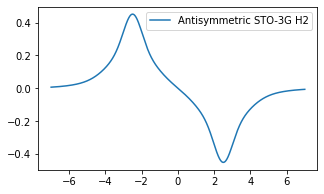

In [ ]:
x = np.linspace(-7,7,num=1000)
r1 = abs(x+2.5)
r2 = abs(x-2.5)

c = [0.444635,0.535328,0.154329]
alpha = [0.109818,0.405771,2.227660]

psi = 0
for k in range(3):
  psi += c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r1**2) \
  - c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r2**2)

plt.figure(figsize=(5,3))
plt.plot(x,psi,label="Antisymmetric STO-3G H2")
plt.legend()

Figure 4.8 – Plot of the antisymmetric STO-3G function for the 1 s orbital of the hydrogen molecule

# 4.6. Constructing a fermionic Hamiltonian with Qiskit Nature

## 4.6.1. Constructing a fermionic Hamiltonian operator of the hydrogen molecule

In [ ]:
hydrogen_molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                              ['H', [0., 0., 0.735]]],
                     charge=0, multiplicity=1)

In [ ]:
driver = ElectronicStructureMoleculeDriver(hydrogen_molecule, basis='sto3g', driver_type=ElectronicStructureDriverType.PYSCF)

In [ ]:
qH2 = driver.run()

In [ ]:
H2_fermionic_hamiltonian = ElectronicStructureProblem(driver)

In [ ]:
H2_second_q_op = H2_fermionic_hamiltonian.second_q_ops()

In [ ]:
def get_particle_number(problem, show=True):
  particle_number = problem.grouped_property_transformed.get_property("ParticleNumber")
  num_particles = (particle_number.num_alpha, particle_number.num_beta)
  num_spin_orbitals = particle_number.num_spin_orbitals
  if show:
    print("Number of alpha electrons: {}".format(particle_number.num_alpha))
    print("Number of beta electrons: {}".format(particle_number.num_beta))
    print("Number of spin orbitals: {}".format(num_spin_orbitals))
  return particle_number

In [ ]:
print("Hydrogen molecule, basis: sto3g, Hartree-Fock calculation")
H2_particle_number = get_particle_number(H2_fermionic_hamiltonian)

Hydrogen molecule, basis: sto3g, Hartree-Fock calculation
Number of alpha electrons: 1
Number of beta electrons: 1
Number of spin orbitals: 4


In [ ]:
def get_electronic_energy(problem, show=True):
  electronic_energy = problem.grouped_property_transformed.get_property("ElectronicEnergy")
  if show:
    print(electronic_energy)
  return electronic_energy

In [ ]:
H2_electronic_energy = get_electronic_energy(H2_fermionic_hamiltonian)

ElectronicEnergy
	(AO) 1-Body Terms:
		Alpha
		<(2, 2) matrix with 4 non-zero entries>
		[0, 0] = -1.1242175791954514
		[0, 1] = -0.9652573993472754
		[1, 0] = -0.9652573993472754
		[1, 1] = -1.1242175791954514
		Beta
		<(2, 2) matrix with 4 non-zero entries>
		[0, 0] = -1.1242175791954514
		[0, 1] = -0.9652573993472754
		[1, 0] = -0.9652573993472754
		[1, 1] = -1.1242175791954514
	(AO) 2-Body Terms:
		Alpha-Alpha
		<(2, 2, 2, 2) matrix with 16 non-zero entries>
		[0, 0, 0, 0] = 0.7746059439198978
		[0, 0, 0, 1] = 0.4474457245330949
		[0, 0, 1, 0] = 0.447445724533095
		[0, 0, 1, 1] = 0.5718769760004512
		[0, 1, 0, 0] = 0.4474457245330951
		... skipping 11 entries
		Beta-Alpha
		<(2, 2, 2, 2) matrix with 16 non-zero entries>
		[0, 0, 0, 0] = 0.7746059439198978
		[0, 0, 0, 1] = 0.4474457245330949
		[0, 0, 1, 0] = 0.447445724533095
		[0, 0, 1, 1] = 0.5718769760004512
		[0, 1, 0, 0] = 0.4474457245330951
		... skipping 11 entries
		Beta-Beta
		<(2, 2, 2, 2) matrix with 16 non-zero entries>


Figure 4.10 – Hydrogen molecule, Electronic Energy, Molecular Orbital (MO), 1-Body Terms

Figure 4.11 – Hydrogen molecule, Electronic Energy, Molecular Orbital (MO), 2-Body Terms

In [ ]:
# Set truncation to None
H2_second_q_op[0].set_truncation(0)
# Print the Fermionic operator
print("Hydrogen molecule")
print(H2_second_q_op[0])

Hydrogen molecule
Fermionic Operator
register length=4, number terms=14
  (0.18093119978423106+0j) * ( +_0 -_1 +_2 -_3 )
+ (-0.18093119978423128+0j) * ( +_0 -_1 -_2 +_3 )
+ (-0.18093119978423128+0j) * ( -_0 +_1 +_2 -_3 )
+ (0.18093119978423144+0j) * ( -_0 +_1 -_2 +_3 )
+ (-0.47189600728114245+0j) * ( +_3 -_3 )
+ (-1.2563390730032498+0j) * ( +_2 -_2 )
+ (0.4836505304710653+0j) * ( +_2 -_2 +_3 -_3 )
+ (-0.47189600728114245+0j) * ( +_1 -_1 )
+ (0.6985737227320175+0j) * ( +_1 -_1 +_3 -_3 )
+ (0.6645817302552965+0j) * ( +_1 -_1 +_2 -_2 )
+ (-1.2563390730032498+0j) * ( +_0 -_0 )
+ (0.6645817302552965+0j) * ( +_0 -_0 +_3 -_3 )
+ (0.6757101548035161+0j) * ( +_0 -_0 +_2 -_2 )
+ (0.4836505304710653+0j) * ( +_0 -_0 +_1 -_1 )


Figure 4.13 – Fermionic Hamiltonian operator of the hydrogen molecule

In [ ]:
print(H2_second_q_op[0].to_matrix())

  (1, 1)	(-0.47189600728114245+0j)
  (2, 2)	(-1.2563390730032498+0j)
  (3, 3)	(-1.244584549813327+0j)
  (4, 4)	(-0.47189600728114245+0j)
  (5, 5)	(-0.24521829183026744+0j)
  (10, 5)	(0.18093119978423106+0j)
  (6, 6)	(-1.0636533500290957+0j)
  (9, 6)	(0.18093119978423128-0j)
  (7, 7)	(-0.35332510410715545+0j)
  (8, 8)	(-1.2563390730032498+0j)
  (6, 9)	(0.18093119978423128-0j)
  (9, 9)	(-1.0636533500290957+0j)
  (5, 10)	(0.18093119978423144+0j)
  (10, 10)	(-1.8369679912029833+0j)
  (11, 11)	(-1.1606317377577642+0j)
  (12, 12)	(-1.244584549813327+0j)
  (13, 13)	(-0.35332510410715534+0j)
  (14, 14)	(-1.1606317377577637+0j)
  (15, 15)	(0.2142782384194728+0j)


Figure 4.14 – Matrix representation of the fermionic Hamiltonian operator of the hydrogen molecule in the Fock basis

## 4.6.2. Constructing a fermionic Hamiltonian operator of the lithium hydride molecule

In [ ]:
LiH_molecule = Molecule(geometry=[['Li', [0., 0., 0.]],
                              ['H', [0., 0., 1.5474]]],
                     charge=0, multiplicity=1)

In [ ]:
driver = ElectronicStructureMoleculeDriver(LiH_molecule, basis='sto3g', driver_type=ElectronicStructureDriverType.PYSCF)

In [ ]:
LiH_fermionic_hamiltonian = ElectronicStructureProblem(driver, transformers=[FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3])])

In [ ]:
LiH_second_q_op = LiH_fermionic_hamiltonian.second_q_ops()

In [ ]:
print("Lithium hydride molecule, basis: sto3g, Hartree-Fock calculation")
print("Parameters freeze_core=True, remove_orbitals=[4, 3]")
LiH_particle_number = get_particle_number(LiH_fermionic_hamiltonian)

Lithium hydride molecule, basis: sto3g, Hartree-Fock calculation
Parameters freeze_core=True, remove_orbitals=[4, 3]
Number of alpha electrons: 1
Number of beta electrons: 1
Number of spin orbitals: 6


Figure 4.17 – Lithium hydride molecule, Hartree-Fock calculation for the basis STO-3G, Particle Number

In [ ]:
LiH_electronic_energy = get_electronic_energy(LiH_fermionic_hamiltonian)

ElectronicEnergy
	(AO) 1-Body Terms:
		Alpha
		<(6, 6) matrix with 18 non-zero entries>
		[0, 0] = -3.078310320337139
		[0, 1] = -0.81474726211031
		[0, 4] = -0.01576016905175541
		[0, 5] = -0.26470827042651535
		[1, 0] = -0.81474726211031
		... skipping 13 entries
		Beta
		<(6, 6) matrix with 18 non-zero entries>
		[0, 0] = -3.078310320337139
		[0, 1] = -0.81474726211031
		[0, 4] = -0.01576016905175541
		[0, 5] = -0.26470827042651535
		[1, 0] = -0.81474726211031
		... skipping 13 entries
	(AO) 2-Body Terms:
		Alpha-Alpha
		<(6, 6, 6, 6) matrix with 368 non-zero entries>
		[0, 0, 0, 0] = 1.6803951695337487
		[0, 0, 0, 1] = 0.26542036460780716
		[0, 0, 0, 5] = 0.07982930717333647
		[0, 0, 1, 0] = 0.26542036460780705
		[0, 0, 1, 1] = 0.3977268610897301
		... skipping 363 entries
		Beta-Alpha
		<(6, 6, 6, 6) matrix with 368 non-zero entries>
		[0, 0, 0, 0] = 1.6803951695337487
		[0, 0, 0, 1] = 0.26542036460780716
		[0, 0, 0, 5] = 0.07982930717333647
		[0, 0, 1, 0] = 0.26542036460780705
		

Figure 4.18 – LiH molecule, Electronic Energy, Molecular Orbital (MO), 1-Body Terms

Figure 4.19 – LiH molecule, Electronic Energy, Molecular Orbital (MO), 2-Body Terms

In [ ]:
# Set truncation to 1000
LiH_second_q_op[0].set_truncation(1000)
# Print the Fermionic operator
print("Lithium hydride molecule")
print(LiH_second_q_op[0])

Lithium hydride molecule
Fermionic Operator
register length=6, number terms=117
  (0.012557929502017541+0j) * ( +_0 -_1 +_3 -_4 )
+ (-0.033996633879259+0j) * ( +_0 -_1 +_3 -_5 )
+ (-0.012557929502017525+0j) * ( +_0 -_1 -_3 +_4 )
+ (0.033996633879259+0j) * ( +_0 -_1 -_3 +_5 )
+ (0.008886443232603718+0j) * ( +_0 -_1 +_4 -_5 )
+ (-0.008886443232603734+0j) * ( +_0 -_1 -_4 +_5 )
+ (0.047702123384741786+0j) * ( +_0 -_1 )
+ (-0.04272742513177429+0j) * ( +_0 -_1 +_5 -_5 )
+ (0.00678985984956748+0j) * ( +_0 -_1 +_4 -_4 )
+ (-0.047702117137987984+0j) * ( +_0 -_1 +_3 -_3 )
+ (-0.0112914120681648+0j) * ( +_0 -_1 +_2 -_2 )
+ (-0.033996633879259+0j) * ( +_0 -_2 +_3 -_4 )
+ (0.12338438785308109+0j) * ( +_0 -_2 +_3 -_5 )
+ (0.03399663387925899+0j) * ( +_0 -_2 -_3 +_4 )
+ (-0.12338438785308103+0j) * ( +_0 -_2 -_3 +_5 )
+ (-0.03143601306360943+0j) * ( +_0 -_2 +_4 -_5 )
+ (0.03143601306360949+0j) * ( +_0 -_2 -_4 +_5 )
+ (-0.12958118897498905+0j) * ( +_0 -_2 )
+ (0.13755899256190185+0j) * ( +_0 -_2 +_5 -_

Figure 4.20 – First 20 terms of the fermionic Hamiltonian operator of the lithium hydride molecule

In [ ]:
print(LiH_second_q_op[0].to_matrix())

  (1, 1)	(-0.22617114899840213+0j)
  (2, 1)	(0.06823802789337412+0j)
  (4, 1)	(-0.12958118897498905+0j)
  (1, 2)	(0.06823802789337409-0j)
  (2, 2)	(-0.35909729348089553+0j)
  (4, 2)	(0.047702123384741786+0j)
  (3, 3)	(-0.36985826494690544+0j)
  (5, 3)	(0.036410711316576985+0j)
  (6, 3)	(0.14941663465690633-0j)
  (1, 4)	(-0.12958118897498894+0j)
  (2, 4)	(0.047702123384741855-0j)
  (4, 4)	(-0.7806641144801545+0j)
  (3, 5)	(0.03641071131657707+0j)
  (5, 5)	(-0.6744095760097704+0j)
  (6, 5)	(0.05111732964054268+0j)
  (3, 6)	(0.14941663465690622+0j)
  (5, 6)	(0.051117329640542525+0j)
  (6, 6)	(-0.9271642107743681+0j)
  (7, 7)	(-0.6054994947715917+0j)
  (8, 8)	(-0.22617114899840213+0j)
  (16, 8)	(0.06823802789337412+0j)
  (32, 8)	(-0.12958118897498905+0j)
  (9, 9)	(0.0030311090617821668+0j)
  (10, 9)	(0.024426933598154912+0j)
  (12, 9)	(0.007977803586912802+0j)
  :	:
  (53, 54)	(0.03601000248380609+0j)
  (54, 54)	(-0.5746431503966059+0j)
  (31, 55)	(-0.10677454473511674+0j)
  (47, 55)	(-0.0

Figure 4.21 – Matrix representation of the Fermionic Hamiltonian operator of the lithium hydride molecule in the Fock basis

# 4.7. Fermion to qubit mappings

## 4.7.1. Qubit creation and annihilation operators

## 4.7.2. Jordan-Wigner transformation

In [ ]:
def label_to_qubit(label, converter):
    qubit_converter = QubitConverter(converter)
    f_op = FermionicOp(label)
    qubit_op = qubit_converter.convert(f_op)
    return qubit_op

In [ ]:
for k in ("+_0", "+_1", "+_2", "+_3", "+_4"):
  qubit_op = label_to_qubit(k, JordanWignerMapper())
  print("{}:\n {}\n".format(k, qubit_op))

+_0:
 0.5 * X
+ -0.5j * Y

+_1:
 0.5 * XZ
+ -0.5j * YZ

+_2:
 0.5 * XZZ
+ -0.5j * YZZ

+_3:
 0.5 * XZZZ
+ -0.5j * YZZZ

+_4:
 0.5 * XZZZZ
+ -0.5j * YZZZZ



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: The default value for `display_format` will be changed from 'dense' to 'sparse' in version 0.3.0. Once that happens, you must specify display_format='dense' directly.
  This is separate from the ipykernel package so we can avoid doing imports until


Figure 4.24 – Jordan-Wigner transformation illustrated with "+_0", "+_1", "+_2", "+_3", "+_4"

## 4.7.3. Parity transformation

In [ ]:
for k in ("+_0", "+_1", "+_2", "+_3", "+_4"):
  qubit_op = label_to_qubit(k, ParityMapper())
  print("{}:\n {}\n".format(k, qubit_op))

+_0:
 0.5 * X
+ -0.5j * Y

+_1:
 -0.5j * YI
+ 0.5 * XZ

+_2:
 -0.5j * YII
+ 0.5 * XZI

+_3:
 -0.5j * YIII
+ 0.5 * XZII

+_4:
 -0.5j * YIIII
+ 0.5 * XZIII



Figure 4.26 – Parity transformation illustrated with "+_0", "+_1", "+_2", "+_3", "+_4"

## 4.7.4. Bravyi-Kitaev transformation

In [ ]:
def BK(m):
  I = [[1, 0], [0, 1]]
  d = {}
  d[0] = [1]
  for k in range(0, m):
    B = np.kron(I,d[k])
    for l in range(2**k, 2**(k+1)):
      B[0,l] = 1
    d[k+1] = B
  return d

In [ ]:
d = BK(3)
for k, v in d.items():
  s = "B_{"+str(2**k)+"} = "
  display(array_to_latex(v, prefix=s, precision = 0))
  print(" ")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Figure 4.27 – Bravyi-Kitaev matrices $B_1$, $B_2$, $B_4$ and $B_8$

In [ ]:
for k in ("+_0", "+_1", "+_2", "+_3", "+_4"):
  qubit_op = label_to_qubit(k, BravyiKitaevMapper())
  print("{}:\n {}\n".format(k, qubit_op))

+_0:
 0.5 * X
+ -0.5j * Y

+_1:
 -0.5j * YI
+ 0.5 * XZ

+_2:
 0.5 * XZI
+ -0.5j * YZI

+_3:
 -0.5j * YIII
+ 0.5 * XZZI

+_4:
 0.5 * XZIII
+ -0.5j * YZIII



Figure 4.29 – Bravyi-Kitaev transformation illustrated with "+_0", "+_1", "+_2", "+_3", "+_4"

# 4.8. Constructing a qubit Hamiltonian with Qiskit Nature

In [ ]:
def fermion_to_qubit(f_op, second_q_op, mapper, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
  if show:
    print("Qubit Hamiltonian operator")
  dmap = {"Jordan-Wigner": JordanWignerMapper(), "Parity": ParityMapper(), "Bravyi-Kitaev": BravyiKitaevMapper()}
  qubit_op = None
  qubit_converter = None
  for k, v in dmap.items():
    if k == mapper:
      if show:
        print("{} transformation ". format(mapper))
      qubit_converter = QubitConverter(v, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction)
      if two_qubit_reduction:
        qubit_op = qubit_converter.convert(second_q_op[0], num_particles=f_op.num_particles)
      else:
        qubit_op = qubit_converter.convert(second_q_op[0])
      n_items = len(qubit_op)
      if show:
        print("Number of items in the Pauli list:", n_items)
        if n_items <= truncate:
          print(qubit_op)
        else:
          print(qubit_op[0:truncate])
  return qubit_op, qubit_converter

## 4.8.1. Constructing a qubit Hamiltonian operator of the hydrogen molecule

In [ ]:
print("Hydrogen molecule")
H2_qubit_op, qubit_converter = fermion_to_qubit(H2_fermionic_hamiltonian, H2_second_q_op, "Jordan-Wigner", two_qubit_reduction=True)

Hydrogen molecule
Qubit Hamiltonian operator
Jordan-Wigner transformation 
Number of items in the Pauli list: 15
-0.8105479805373281 * IIII
- 0.22575349222402358 * ZIII
+ 0.17218393261915543 * IZII
+ 0.12091263261776633 * ZZII
- 0.22575349222402358 * IIZI
+ 0.17464343068300436 * ZIZI
+ 0.16614543256382414 * IZZI
+ 0.17218393261915543 * IIIZ
+ 0.16614543256382414 * ZIIZ
+ 0.16892753870087904 * IZIZ
+ 0.12091263261776633 * IIZZ
+ 0.04523279994605781 * XXXX
+ 0.04523279994605781 * YYXX
+ 0.04523279994605781 * XXYY
+ 0.04523279994605781 * YYYY


Figure 4.30 – Qubit Hamiltonian operator of the hydrogen molecule with Jordan-Wigner transformation

In [ ]:
print("Hydrogen molecule")
H2_qubit_op, qubit_converter = fermion_to_qubit(H2_fermionic_hamiltonian, H2_second_q_op, "Parity", two_qubit_reduction=True)

Hydrogen molecule
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
-1.0523732457728605 * II
+ (-0.39793742484317884+1.3877787807814457e-17j) * ZI
+ (0.39793742484317884-2.7755575615628914e-17j) * IZ
+ (-0.011280104256235116+1.3877787807814457e-17j) * ZZ
+ (0.18093119978423114-3.469446951953614e-18j) * XX


Figure 4.29 – Qubit Hamiltonian operator of H2 with parity transformation, two_qubit_reduction True

In [ ]:
print("Hydrogen molecule")
H2_qubit_op, qubit_converter = fermion_to_qubit(H2_fermionic_hamiltonian, H2_second_q_op, "Bravyi-Kitaev", two_qubit_reduction=True)

Hydrogen molecule
Qubit Hamiltonian operator
Bravyi-Kitaev transformation 
Number of items in the Pauli list: 15
-0.8105479805373281 * IIII
+ 0.17218393261915543 * IZII
+ 0.12091263261776633 * IIZI
+ 0.12091263261776633 * ZIZI
- 0.22575349222402358 * ZZZI
+ 0.17218393261915543 * IIIZ
+ 0.16892753870087904 * IZIZ
+ 0.17464343068300436 * ZZIZ
- 0.22575349222402358 * IIZZ
+ 0.16614543256382414 * IZZZ
+ 0.16614543256382414 * ZZZZ
+ 0.04523279994605781 * IXIX
+ 0.04523279994605781 * ZXIX
- 0.04523279994605781 * IXZX
- 0.04523279994605781 * ZXZX


Figure 4.30 – Qubit Hamiltonian operator of H2 with Bravyi-Kitaev transformation

## 4.8.2. Constructing a qubit Hamiltonian operator of the lithium hydride molecule

In [ ]:
print("Lithium hydride molecule")
print("Using the ParityMapper with two_qubit_reduction=True to eliminate two qubits")
print("Setting z2symmetry_reduction=\"auto\"")
LiH_qubit_op, qubit_converter = fermion_to_qubit(LiH_fermionic_hamiltonian, LiH_second_q_op, "Parity", two_qubit_reduction=True, z2symmetry_reduction="auto")

Lithium hydride molecule
Using the ParityMapper with two_qubit_reduction=True to eliminate two qubits
Setting z2symmetry_reduction="auto"
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 100
-0.20316606150559316 * IIII
+ (-0.36525869021603524+1.3877787807814457e-17j) * ZIII
+ 0.09275994933497338 * IZII
- 0.211889842970089 * ZZII
+ (0.3652586902160353-2.7755575615628914e-17j) * IIZI
- 0.11384335176464658 * ZIZI
+ 0.11395251883046681 * IZZI
+ (-0.060440128573157816-3.469446951953614e-18j) * ZZZI
+ (-0.09275994933497342+6.938893903907228e-18j) * IIIZ
+ 0.11395251883046682 * ZIIZ
+ (-0.12274244052544372-6.938893903907228e-18j) * IZIZ
+ 0.05628878167217487 * ZZIZ
+ (-0.211889842970089+6.938893903907228e-18j) * IIZZ
+ 0.060440128573157816 * ZIZZ
+ (-0.05628878167217487+3.469446951953614e-18j) * IZZZ
+ 0.08460131391823897 * ZZZZ
+ 0.019389408583698118 * XIII
+ (-0.01938940858369812+4.336808689942018e-19j) * XZII
- 0.010952773573804815 * XIZI
+ 0.01095277357

Figure 4.33 – Qubit Hamiltonian operator of LiH with parity transformation, two_qubit_reduction True

# Summary

# Questions

1. Which of the following terms is neglected in the BO approximation?

A.	Electronic kinetic energy operator.

B.	Nuclear kinetic energy operator.

C.	Potential energy between the electrons and nuclei. It is the sum of all electron-nucleus Coulomb interactions.

D.	Potential energy operator arising from electron-electron Coulomb repulsions.

In [ ]:
#@title Enter your answer A, B, C, D or E or ? for a solution, then execute cell.
answer = " " #@param {type:"string"}
solution = "B"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


2. The Slater determinant wave function is antisymmetric with respect to: 

A.	the exchange of two electrons (permutation of two rows) or, 

B.	with respect to the exchange of two spin orbitals (permutation of two columns)

C.	Or both the above?


In [ ]:
#@title Enter your answer A, B or C or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "C"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


3. Name three fermion to qubit transformations currently supported by Qiskit Nature.

In [ ]:
#@title Enter your answer as one or more words separated by ',' or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "Jordan-Wigner, Parity, Bravyi-Kitaev"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


4. Name two fermion to qubit transformations that simulates a system of electrons with the same number of qubits as electrons.

In [ ]:
#@title Enter your answer as one or more words separated by ',' or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "Jordan-Wigner, Parity"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


5.	For which transformation does the resulting Hamiltonian commute with the number spin up and number spin down operators which can be used to taper off two qubits?

In [ ]:
#@title Enter your answer as one or more words separated by ',' or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "Jordan-Wigner"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again
